# ⚙️ Initiez-vous au MLOps (partie 1/2)

## 📊 Analyse exploratoire
### 🛠️ Préparez l'environnement de travail
#### 📦 Import des modules python

In [62]:
import sys
import os
sys.path.append(os.path.dirname(os.path.dirname(os.path.abspath('__file__'))))

import pandas as pd
import numpy as np
from src.visualization.visu_text import print_title, print_end, print_col, quick_df_info
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("../data/processed/survey_lung_cancer_clean.csv")
quick_df_info(df)


┌-------------------------------* Information *-------------------------------┐
├─------- Shape: (4455, 16) - Colonnes:
├─GENDER                    int64     
├─AGE                       int64     
├─SMOKING                   int64     
├─YELLOW_FINGERS            int64     
├─ANXIETY                   int64     
├─PEER_PRESSURE             int64     
├─CHRONIC DISEASE           int64     
├─FATIGUE                   int64     
├─ALLERGY                   int64     
├─WHEEZING                  int64     
├─ALCOHOL CONSUMING         int64     
├─COUGHING                  int64     
├─SHORTNESS OF BREATH       int64     
├─SWALLOWING DIFFICULTY     int64     
├─CHEST PAIN                int64     
├─LUNG_CANCER               int64     
└------------------------------------------------------------------------------┘


## 🔍 Exploration des données

### 🔬 Analyse Univariée
#### 📖 Complétude

In [10]:
total_missing = df.isnull().sum().sum()
if total_missing == 0:
    print("✅ Aucune valeur manquante détectée !")
else:
    print(f"⚠️  {total_missing} valeur(s) manquante(s) détectée(s)")

df.info()

✅ Aucune valeur manquante détectée !
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4455 entries, 0 to 4454
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   GENDER                 4455 non-null   int64
 1   AGE                    4455 non-null   int64
 2   SMOKING                4455 non-null   int64
 3   YELLOW_FINGERS         4455 non-null   int64
 4   ANXIETY                4455 non-null   int64
 5   PEER_PRESSURE          4455 non-null   int64
 6   CHRONIC DISEASE        4455 non-null   int64
 7   FATIGUE                4455 non-null   int64
 8   ALLERGY                4455 non-null   int64
 9   WHEEZING               4455 non-null   int64
 10  ALCOHOL CONSUMING      4455 non-null   int64
 11  COUGHING               4455 non-null   int64
 12  SHORTNESS OF BREATH    4455 non-null   int64
 13  SWALLOWING DIFFICULTY  4455 non-null   int64
 14  CHEST PAIN             4455 non-null   int64
 15  L


┌-----------------------------* Boxplot des ages *-----------------------------┐


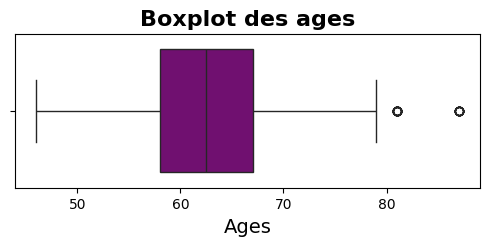

└------------------------------------------------------------------------------┘


In [19]:
def boxplot_age():
    print_title("Boxplot des ages")
    plt.figure(figsize=(6, 2))
    sns.boxplot(data=df, x="AGE", color="purple")
    plt.title(
        "Boxplot des ages", fontsize=16, fontweight="bold"
    )
    plt.xlabel("Ages", fontsize=14)
    plt.show()
    print_end()
boxplot_age()

├─✅ Suppression des outliers effectuée !

┌-----------------------------* Boxplot des ages *-----------------------------┐


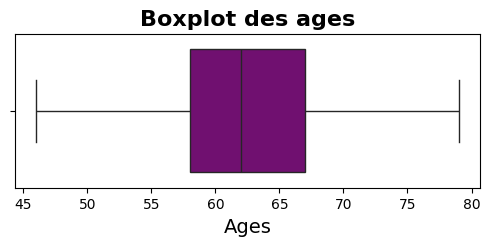

└------------------------------------------------------------------------------┘


In [52]:
df = df[(df["AGE"] > 45) & (df["AGE"] < 81)]
print_col("✅ Suppression des outliers effectuée !")
boxplot_age()


┌--------------------* Distribution de la variable cible *--------------------┐


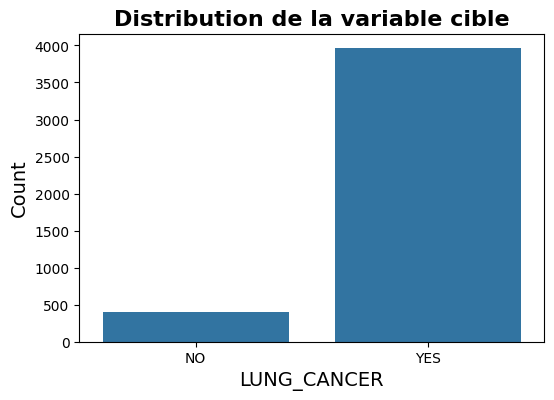

└------------------------------------------------------------------------------┘


In [53]:
# Distribution de la variable cible
print_title("Distribution de la variable cible")
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x="LUNG_CANCER")
plt.title("Distribution de la variable cible", fontsize=16, fontweight="bold")
plt.xlabel("LUNG_CANCER", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.xticks(ticks=[0, 1], labels=["NO", "YES"])
plt.show()
print_end()

⚠️ On constate un déséquilibre d'observations sur la variable cible

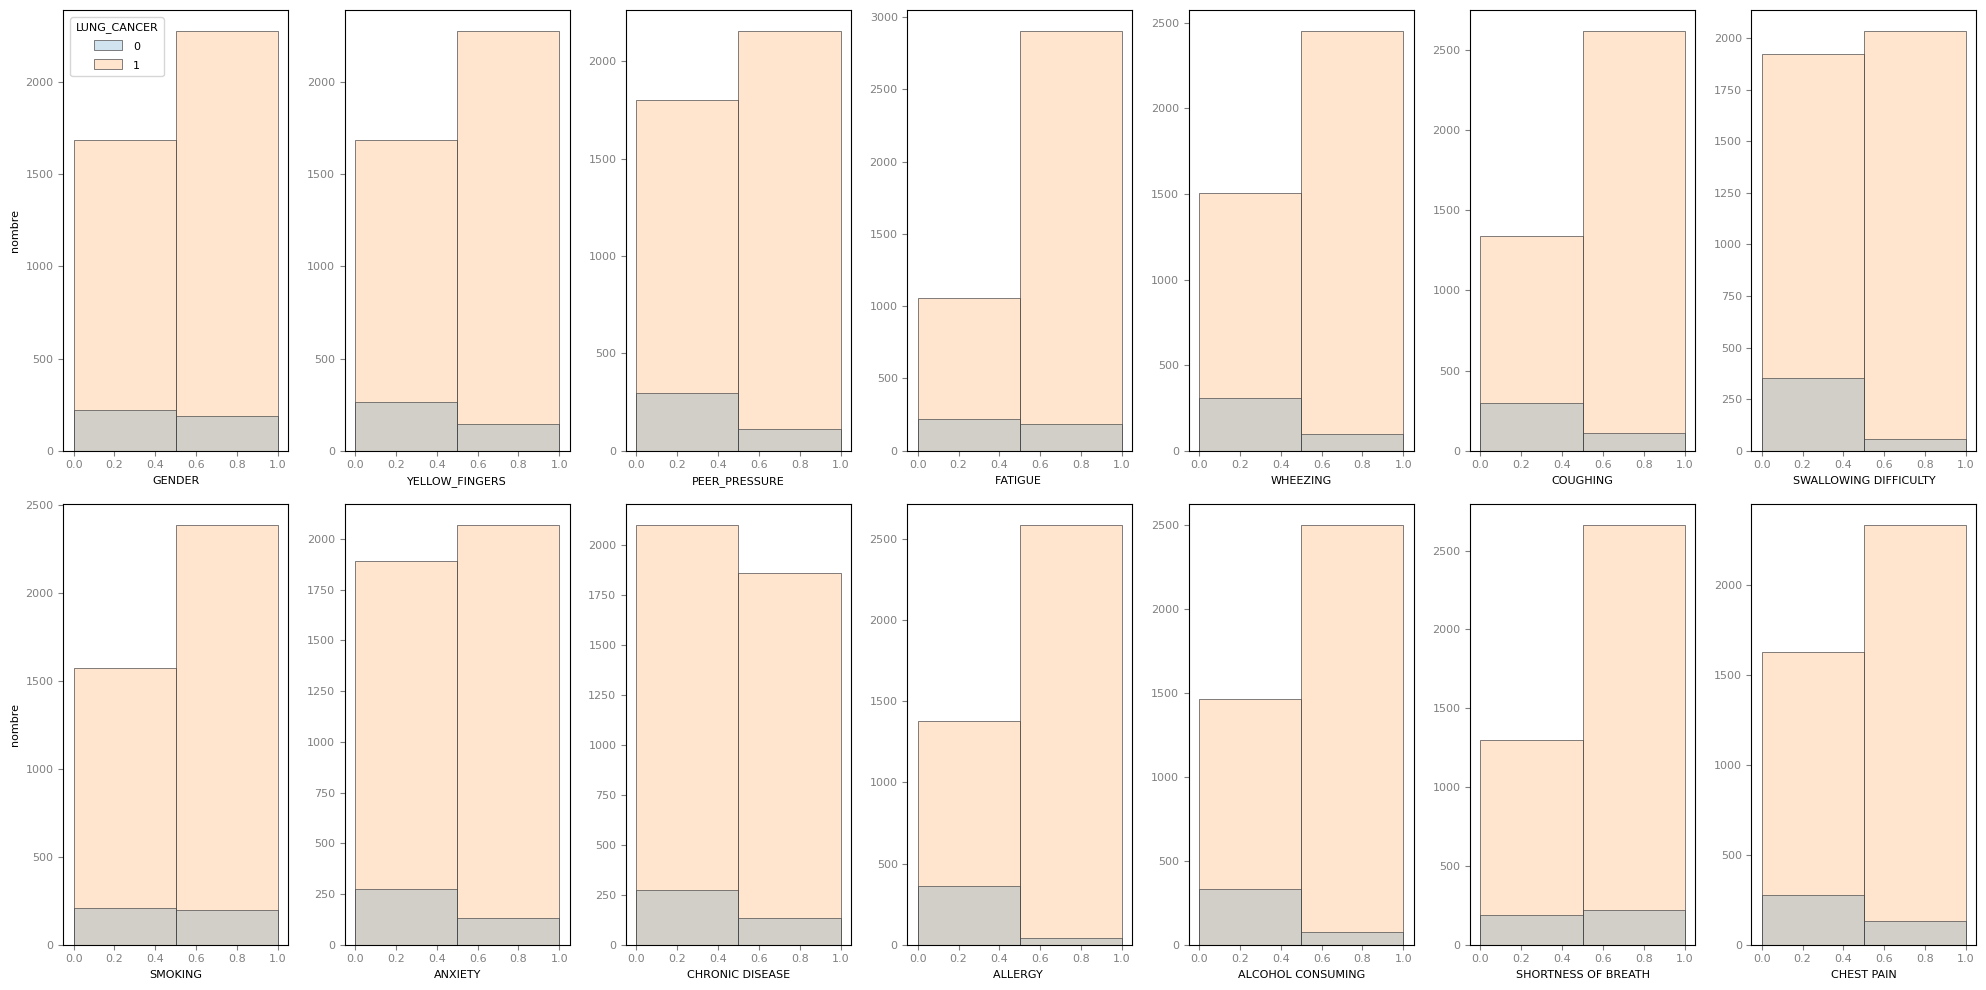

In [54]:
cols = df.select_dtypes(include=["int64", "float64"]).columns.tolist()
cols.remove("LUNG_CANCER")
cols.remove("AGE")
cols
f, ax = plt.subplots(2, 7, figsize=(20, 10))
first = True
i, j = 0, 0
for col in cols:
    sns.histplot(
        df,
        x=col,
        hue="LUNG_CANCER",
         bins=2,
        alpha=0.2,  # Transparence pour les barres
        edgecolor=".3",
        linewidth=0.5,
        ax=ax[i, j],
        legend=first,
        
    )
    ax[i, j].set_xlabel(col, fontsize=8)
    if j == 0:
        ax[i, j].set_ylabel("nombre", fontsize=8)
    else:
        ax[i, j].set_ylabel("")
    if first:
        plt.setp(ax[i, j].get_legend().get_texts(), fontsize=8)
        plt.setp(ax[i, j].get_legend().get_title(), fontsize=8)
        first = False
    ax[i, j].tick_params(axis="x", labelsize=8, colors="gray")
    ax[i, j].tick_params(axis="y", labelsize=8, colors="gray")

    i += 1
    if i == 2:
        i = 0
        j += 1
        if j == 7:
            j = 0


plt.tight_layout()
plt.show()


┌------* Histogrammes des cas de cancer du poumon en fonction de l'age *------┐


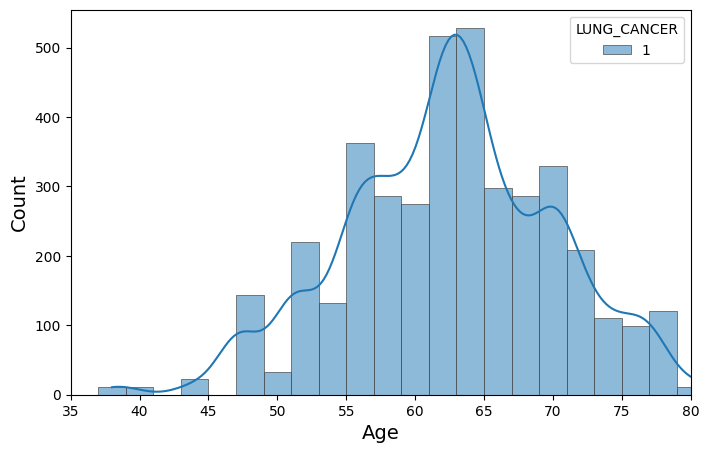

└------------------------------------------------------------------------------┘


In [65]:
# Histogrammes des cas de cancer du poumon en fonction de l'age
print_title("Histogrammes des cas de cancer du poumon en fonction de l'age")
# Bins de 2 ans sur toute la plage des données
min_age = df['AGE'].min()
max_age = df['AGE'].max()
bins = np.arange(min_age, max_age + 2, 2)
plt.figure(figsize=(8, 5))
sns.histplot(
    df[df["LUNG_CANCER"] == 1],
    x="AGE",
    hue="LUNG_CANCER",
    kde=True,
    bins=bins,
    edgecolor=".3",
    linewidth=0.5,
    color="purple",
    
)
plt.xlabel("Age", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.xlim(35, 80) 
plt.show()
print_end() 